# Exercise: Clustering Algorithms with Scikit Learn
<img src="../IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [11]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [12]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

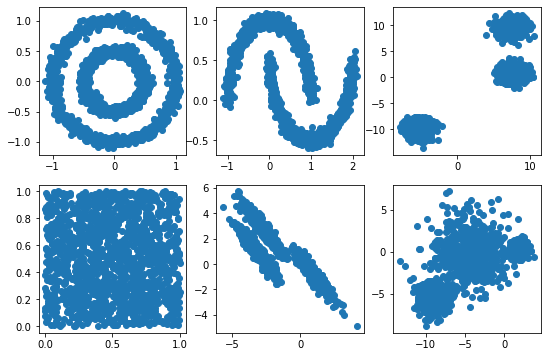

In [13]:

fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1])
axes[0, 1].scatter(B[:,0], B[:,1])
axes[0, 2].scatter(C[:,0], C[:,1])
axes[1, 0].scatter(D[:,0], D[:,1])
axes[1, 1].scatter(E[:,0], E[:,1])
axes[1, 2].scatter(F[:,0], F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

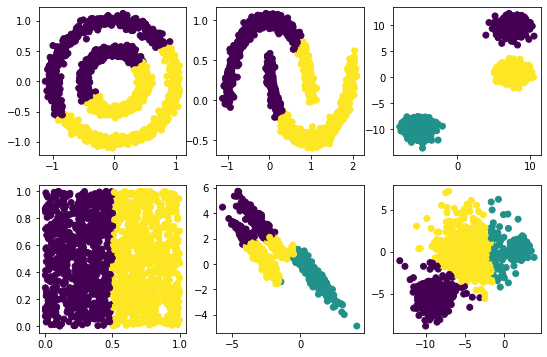

In [14]:
from sklearn.cluster import KMeans
kmeansA = KMeans(n_clusters=2, random_state=0).fit(A)
kmeansB = KMeans(n_clusters=2, random_state=0).fit(B)
kmeansC = KMeans(n_clusters=3, random_state=0).fit(C)
kmeansD = KMeans(n_clusters=2, random_state=0).fit(D)
kmeansE = KMeans(n_clusters=3, random_state=0).fit(E)
kmeansF = KMeans(n_clusters=3, random_state=0).fit(F)

#plot again, now with lable coloring
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=kmeansA.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=kmeansB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=kmeansC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=kmeansD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=kmeansE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=kmeansF.labels_)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

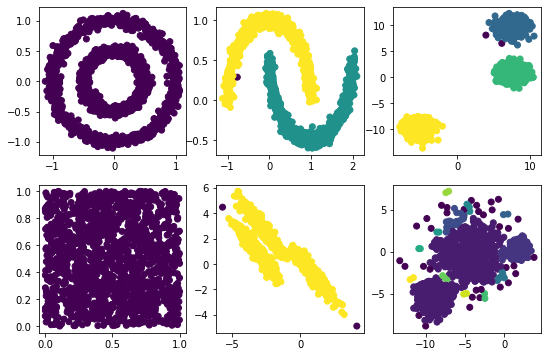

In [15]:
from sklearn.cluster import DBSCAN
db_A = DBSCAN(eps=1, min_samples=2).fit(A)
db_B = DBSCAN(eps=0.1, min_samples=2).fit(B)
db_C = DBSCAN(eps=1, min_samples=2).fit(C)
db_D = DBSCAN(eps=0.1, min_samples=2).fit(D)
db_E = DBSCAN(eps=1, min_samples=5).fit(E) #hard to find googd params here
db_F = DBSCAN(eps=0.6, min_samples=2).fit(F) #hard to find googd params here
#plot again, now with lable coloring
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=db_A.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=db_B.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=db_C.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=db_D.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=db_E.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=db_F.labels_)

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
#sample results for DataSet C
silhouette_score(C,kmeansC.labels_)

0.8290743874701529

In [18]:
silhouette_score(C,db_C.labels_)

0.7072344127507779

Note: "The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."

